<h3><strong><i><span style="color:red;">This notebook primarily focuses on univariate analysis, but I've incorporated preprocessing steps to provide insight into the preprocessing procedure, including technique for managing missing values. In the final section of this notebook, I conduct univariate analysis on the refined dataset.</span></i></strong></h3>


# Importing libraries

In [312]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importing dataset

In [313]:
# Importing dataset
df = pd.read_csv("Titanic dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


<h1 style="color: purple;">Data Preprocessing</h1>

### Shape of the dataset

In [314]:
df.shape

(418, 12)

### Information regarding dataset

In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


### Checking duplicate values

In [316]:
# Is there any duplicate value in dataset?
df.duplicated().sum()

0

### Dropping unneccessary columns

In [317]:
# Dropping columns which are not of use in analysis and modelling
columns_to_drop = ['PassengerId', 'Name','Ticket', 'Fare','Cabin']
df = df.drop(columns=columns_to_drop)

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,34.5,0,0,Q
1,1,3,female,47.0,1,0,S
2,0,2,male,62.0,0,0,Q
3,0,3,male,27.0,0,0,S
4,1,3,female,22.0,1,1,S


## Handling missing values

In [318]:
# Null values in dataset?
df.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Embarked     0
dtype: int64

In [319]:
# Checking the percentage of data missing in each column
df.isnull().mean()*100

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         20.574163
SibSp        0.000000
Parch        0.000000
Embarked     0.000000
dtype: float64

In [320]:
# Here, I defined a custom function fill_random(row, mean, std) that takes a row, mean, and standard deviation as inputs. 
# Inside this function, if the value in the row is missing (NaN), it fills it with a random value generated from a 
# normal distribution with the specified mean and standard deviation. If the value is not missing, it leaves it unchanged.

# Defining a function to generate random values for missing data
def fill_random(row, mean, std):
    if pd.isna(row):
        return np.random.normal(mean, std)
    else:
        return row

In [321]:
# Defining mean and standard deviation for random value
mean_age = df['Age'].mean()
std_age = df['Age'].std()

# Applying the function to create new columns filling missing values with random values
df['Age_random'] = df['Age'].apply(lambda x: fill_random(x, mean_age, std_age))

In [322]:
# Calculate the mean age from the 'Age' column
mean_age = df['Age'].mean()
print('Mean of Age column:', mean_age)

# Fill missing values in the 'Age' column with the mean age and create a new column 'Age_mean'
df['Age_mean'] = df['Age'].fillna(mean_age)

Mean of Age column: 30.272590361445783


In [323]:
# Calculate the median age from the 'Age' column
median_age = df['Age'].median()
print('Median of Age column:', median_age)

# Fill missing values in the 'Age' column with the median age and create a new column 'Age_median'
df['Age_median'] = df['Age'].fillna(median_age)

Median of Age column: 27.0


In [324]:
df.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Age_random,Age_mean,Age_median
296,1,2,female,1.0,1,2,C,1.0,1.0,1.0
6,1,3,female,30.0,0,0,Q,30.0,30.0,30.0
370,0,2,male,21.0,1,0,S,21.0,21.0,21.0
394,0,3,male,29.0,3,1,S,29.0,29.0,29.0
24,1,1,female,48.0,1,3,C,48.0,48.0,48.0


In [325]:
# When using mean, median or random value to replace missing values in a dataset, this can impact downstream analyses or modeling.
# For that, we are calculating the variance. We check whether the variance of the imputed datasets has significantly  
# changed as compared to the original dataset.
# To check the spread of the data

print("Original Age variable variance : ", df['Age'].var())
print("Age variance after imputating random value : ", df['Age_random'].var())
print("Age variance after imputating mean value : ", df['Age_mean'].var())
print("Age variance after imputating median value : ", df['Age_median'].var())

Original Age variable variance :  201.10669538455937
Age variance after imputating random value :  201.03089334305233
Age variance after imputating mean value :  159.63145365057315
Age variance after imputating median value :  161.38576830860688


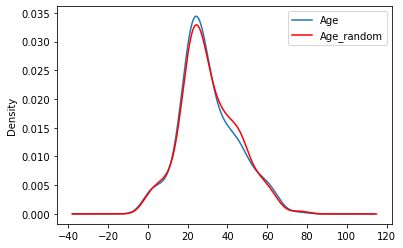

In [326]:
# Now, let's examine the distribution of the original column 'Age' and the 'Age_random' column.

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
df['Age'].plot(kind='kde', ax=ax)

# variable imputed with random value
df['Age_random'].plot(kind='kde', ax=ax, color='red')

# adding legend
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

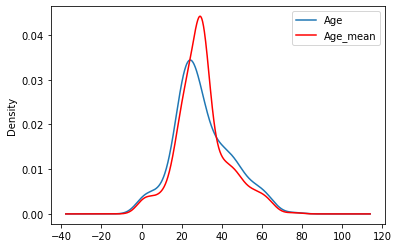

In [327]:
# Now, let's examine the distribution of the original column 'Age' and the 'Age_mean' column.

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
df['Age'].plot(kind='kde', ax=ax)


# variable imputed with mean value
df['Age_mean'].plot(kind='kde', ax=ax, color='red')


# adding legend
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

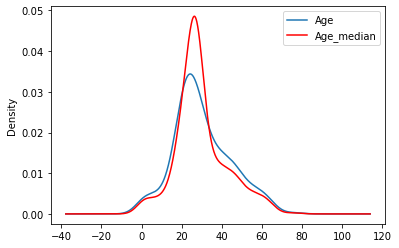

In [328]:
# Now, let's examine the distribution of the original column 'Age' and the 'Age_median' column.

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
df['Age'].plot(kind='kde', ax=ax)


# variable imputed with median value
df['Age_median'].plot(kind='kde', ax=ax, color='red')


# adding legend
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [329]:
# Dropping specified columns from the DataFrame
columns_to_drop = ['Age', 'Age_mean', 'Age_median']
df = df.drop(columns=columns_to_drop)

df.head(3)

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age_random
0,0,3,male,0,0,Q,34.5
1,1,3,female,1,0,S,47.0
2,0,2,male,0,0,Q,62.0


In [330]:
# Renaming the 'Age_random' column to 'Age' in the DataFrame
df.rename(columns={'Age_random': 'Age'}, inplace=True)

df.head(3)

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age
0,0,3,male,0,0,Q,34.5
1,1,3,female,1,0,S,47.0
2,0,2,male,0,0,Q,62.0


In [331]:
# Converting the 'Age' column to integers in the DataFrame
df['Age'] = df['Age'].astype('int')

# Displaying the first 3 rows of the DataFrame after the data type conversion
df.head(3)

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age
0,0,3,male,0,0,Q,34
1,1,3,female,1,0,S,47
2,0,2,male,0,0,Q,62


### Concatenating columns

In [332]:
# Calculating the total number of family members by adding 'SibSp' (siblings/spouses) and 'Parch' (parents/children) columns
df['FamilyMembers'] = df['SibSp'] + df['Parch']

# Displaying a random sample of 5 rows from the DataFrame with the new 'FamilyMembers' column
df.sample(5)

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age,FamilyMembers
407,0,1,male,1,1,C,50,2
335,0,1,male,0,0,S,30,0
164,0,2,male,0,0,S,41,0
113,1,3,female,0,0,Q,18,0
368,1,1,female,0,1,C,45,1


In [333]:
# Dropping specified columns from the DataFrame
columns_to_drop = ['SibSp', 'Parch']
df = df.drop(columns=columns_to_drop)

df.head(3)

,Survived,Pclass,Sex,Embarked,Age,FamilyMembers
0,0,3,male,Q,34,0
1,1,3,female,S,47,1
2,0,2,male,Q,62,0


### One Hot Encoding technique

In [334]:
# Assuming you have a DataFrame called 'df' with 'Sex' column
df = pd.get_dummies(df, columns=['Sex'], prefix='Sex')


# Displaying the first few rows of the DataFrame with the new dummy variables
df.head()

,Survived,Pclass,Embarked,Age,FamilyMembers,Sex_female,Sex_male
0,0,3,Q,34,0,0,1
1,1,3,S,47,1,1,0
2,0,2,Q,62,0,0,1
3,0,3,S,27,0,0,1
4,1,3,S,22,2,1,0


In [335]:
# Creating dummy variables for the 'Embarked' column, which is a categorical variable
df = pd.get_dummies(df, columns=['Embarked'], prefix='Embarked')

# Displaying the first few rows of the DataFrame with the new dummy variables
df.head()

,Survived,Pclass,Age,FamilyMembers,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,34,0,0,1,0,1,0
1,1,3,47,1,1,0,0,0,1
2,0,2,62,0,0,1,0,1,0
3,0,3,27,0,0,1,0,0,1
4,1,3,22,2,1,0,0,0,1


### Reordering the columns

In [336]:
# Reorder the columns so that target column 'Survived' is the last column
column_order = [col for col in df.columns if col != 'Survived'] + ['Survived']
df = df[column_order]

df

,Pclass,Age,FamilyMembers,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived
0,3,34,0,0,1,0,1,0,0
1,3,47,1,1,0,0,0,1,1
2,2,62,0,0,1,0,1,0,0
3,3,27,0,0,1,0,0,1,0
4,3,22,2,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...
413,3,8,0,0,1,0,0,1,0
414,1,39,0,1,0,1,0,0,1
415,3,38,0,0,1,0,0,1,0
416,3,50,0,0,1,0,0,1,0


<h1 style="color: purple;">Exploratory Data Analysis</h1>

## *1) Univariate Analysis*

### Pclass - Bar plot

Text(0, 0.5, 'Frequency')

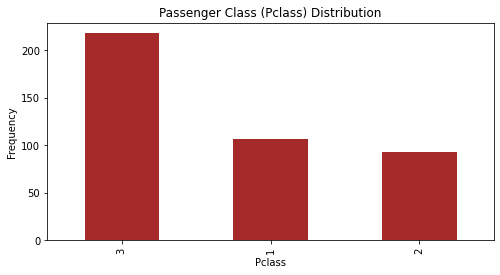

In [337]:
# Create a figure with a specified size
plt.figure(figsize=(8, 4))

# Value counts of Pclass using bar plot
df['Pclass'].value_counts().plot(kind='bar', color='brown')

plt.title('Passenger Class (Pclass) Distribution')
plt.xlabel('Pclass')
plt.ylabel('Frequency')

### Age - Histogram

Text(0, 0.5, 'Frequency')

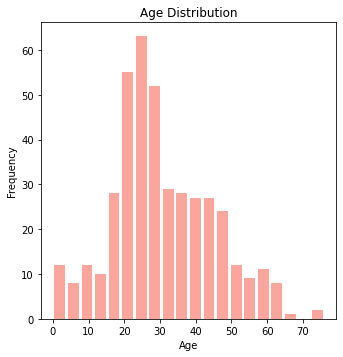

In [338]:
# Create a figure with a specified size
plt.figure(figsize=(18, 12))

# Create a subplot in a 2x3 grid and select the second position
plt.subplot(2, 3, 2)

# Plot a histogram of the 'Age' column with specified settings
plt.hist(df['Age'].dropna(), bins=20, rwidth=0.8, color='salmon', alpha=0.7)

# Set the title, x-axis label, and y-axis label for this subplot
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

### Family Members Distribution - Bar plot 

Text(0, 0.5, 'Frequency')

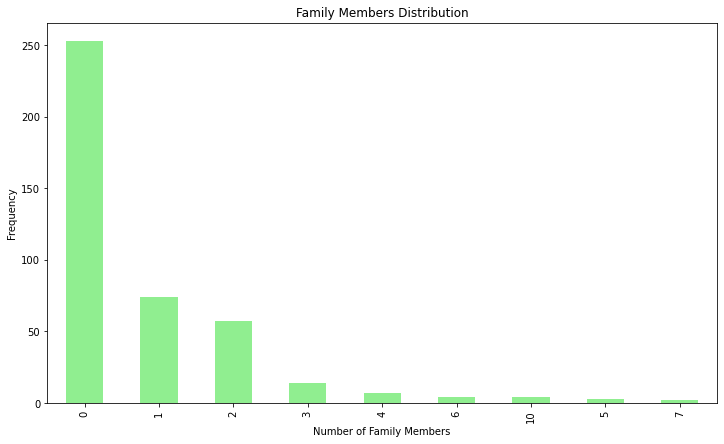

In [339]:
# Create a figure with a specified size
plt.figure(figsize=(12, 7))

# Value counts of FamilyMembers using bar plot
df['FamilyMembers'].value_counts().plot(kind='bar', color='lightgreen')

# Set the title, x-axis label, and y-axis label
plt.title('Family Members Distribution')
plt.xlabel('Number of Family Members')
plt.ylabel('Frequency')

### Gender Distribution - Bar chart

Text(0, 0.5, 'Count')

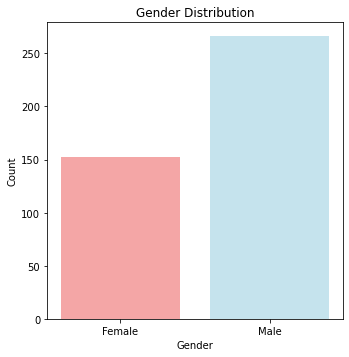

In [340]:
# Create a figure with a specified size
plt.figure(figsize=(18, 12))

# Create a subplot in a 2x3 grid and select the fourth position
plt.subplot(2, 3, 4)

# Calculate the counts of females and males
gender_counts = df['Sex_female'].sum(), df['Sex_male'].sum()

# Define labels for the x-axis
genders = ['Female', 'Male']

# Create a bar chart with specified colors and transparency
plt.bar(genders, gender_counts, color=['lightcoral', 'lightblue'], alpha=0.7)

# Set the title, x-axis label, and y-axis label for this subplot
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

### Embarked_C, Embarked_Q, and Embarked_S - Pie Chart

Text(0.5, 1.0, 'Embarkation Port Distribution')

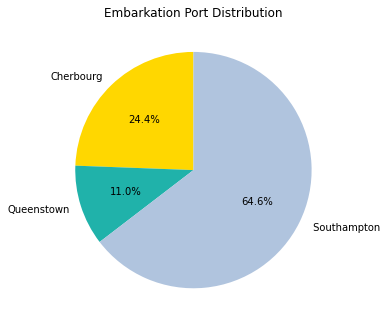

In [341]:
# Create a figure with a specified size
plt.figure(figsize=(18, 12))

plt.subplot(2, 3, 5)
embarked_counts = [df['Embarked_C'].sum(), df['Embarked_Q'].sum(), df['Embarked_S'].sum()]
labels = ['Cherbourg', 'Queenstown', ' Southampton']
colors = ['gold', 'lightseagreen', 'lightsteelblue']
plt.pie(embarked_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Embarkation Port Distribution')

### Survived - Pie Chart

Text(0.5, 1.0, 'Survival Distribution')

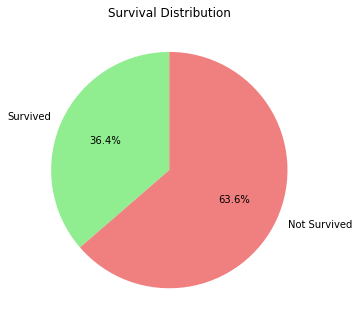

In [342]:
# Create a figure with a specified size
plt.figure(figsize=(18, 12))

plt.subplot(2, 3, 6)
survived_counts = [df['Survived'].sum(), len(df) - df['Survived'].sum()]
labels = ['Survived', 'Not Survived']
colors = ['lightgreen', 'lightcoral']
plt.pie(survived_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Survival Distribution')